The data shows the number of page hits per day, rather than the number of
product sales, but there are many more web pages than products.

The company wants the pages classified into High Volume (used by most visitors to the
site), Medium Volume (used by some visitors to the site) and Low Volume (only used occasionally).

1. Read in the data from the file Pages/DailyHits.csv and
do some basis statistical analysis using the .head() and .describe() functions.


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
             001  002  003  004  005  006  0

The time period under investigation is from Jan 1 to December 31, 2019. There are in total 167 pages. The 001 page has the most hits. The smallest number of hits for any page is 1196 for the 167 page.

2. A bar chart showing the total number of hits for all pages.

015    467123
001    379682
003     27249
080     23357
155     22183
156     21966
048     19229
002     17401
010     17046
004     11668
008      1487
122      1483
092      1450
018      1430
045      1422
dtype: int64


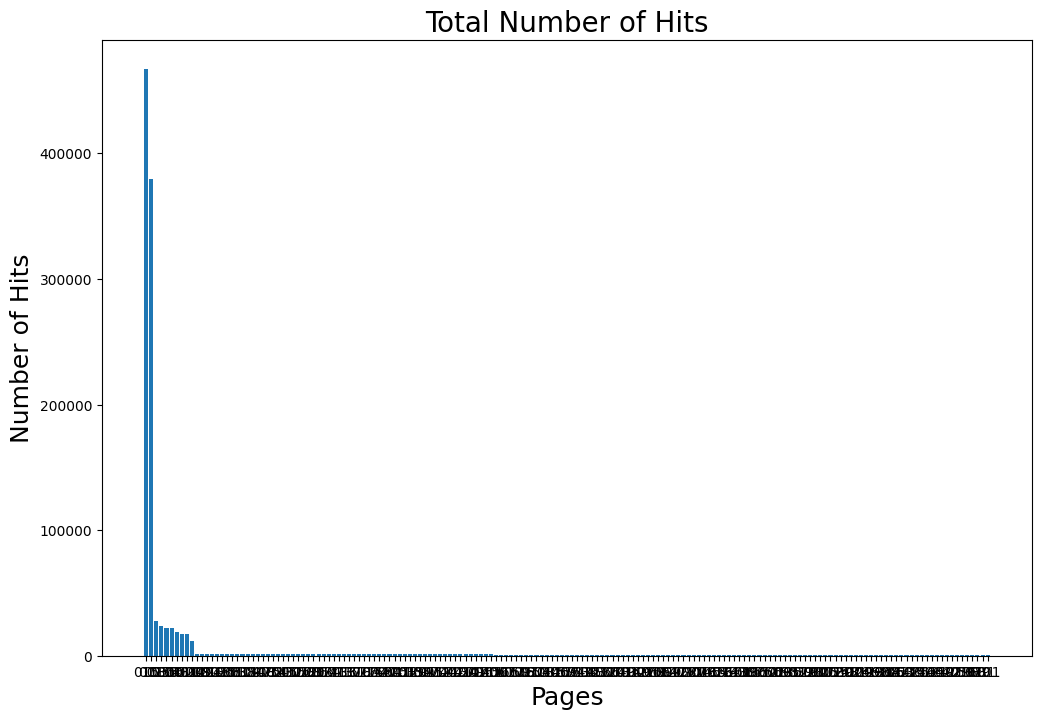

In [11]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum().head(15))

plt.figure(figsize=(12, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align = 'center')
plt.xticks(x_pos, data.columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Total Number of Hits', fontsize=20)
plt.show()


Pages 015 and 001 have a significant number of hits.

3. Create a bar chart showing the total number of hits for high-volume pages.

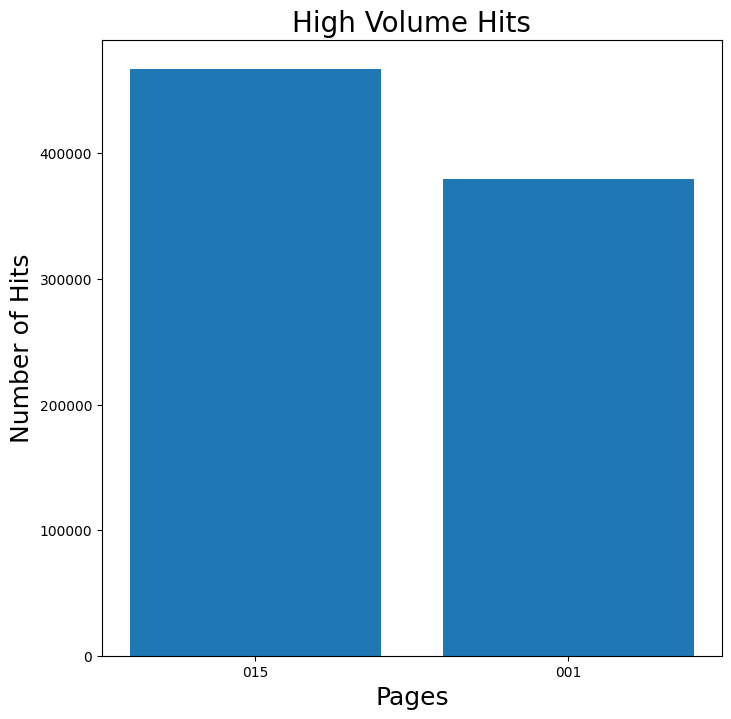

In [6]:
selected=data.columns[data.sum()>30000]

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('High Volume Hits', fontsize=20)
plt.show()

4. Create a bar chart showing the total number of hits for medium-volume pages.

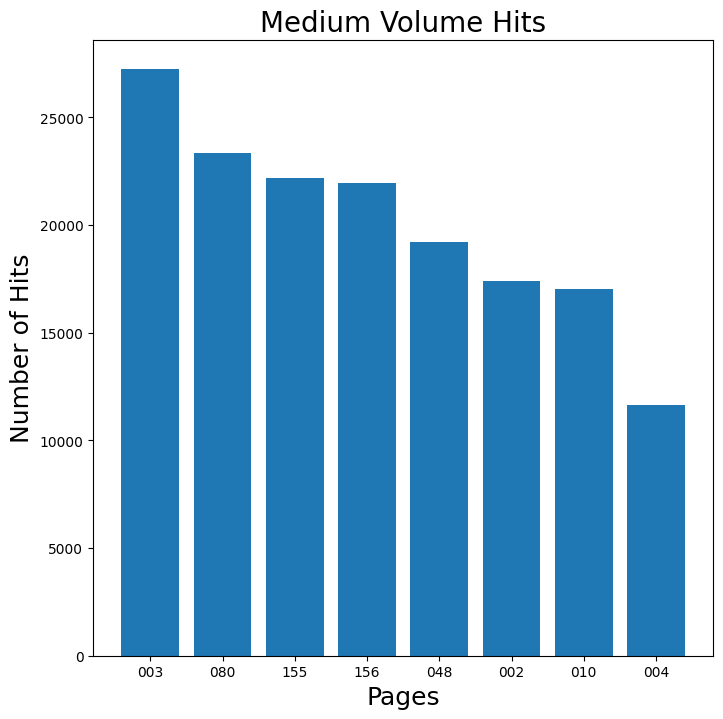

In [7]:
selected = data.columns[(data.sum() > 10000) & (data.sum() < 30000)]

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Medium Volume Hits', fontsize=20)
plt.show()

5. Create a bar chart showing the total number of hits for low volume pages. [Hint: this is a bit harder than the
lecture example as there are too many low volume pages for you to list them all. Instead, select the columns
by value as described last week.]

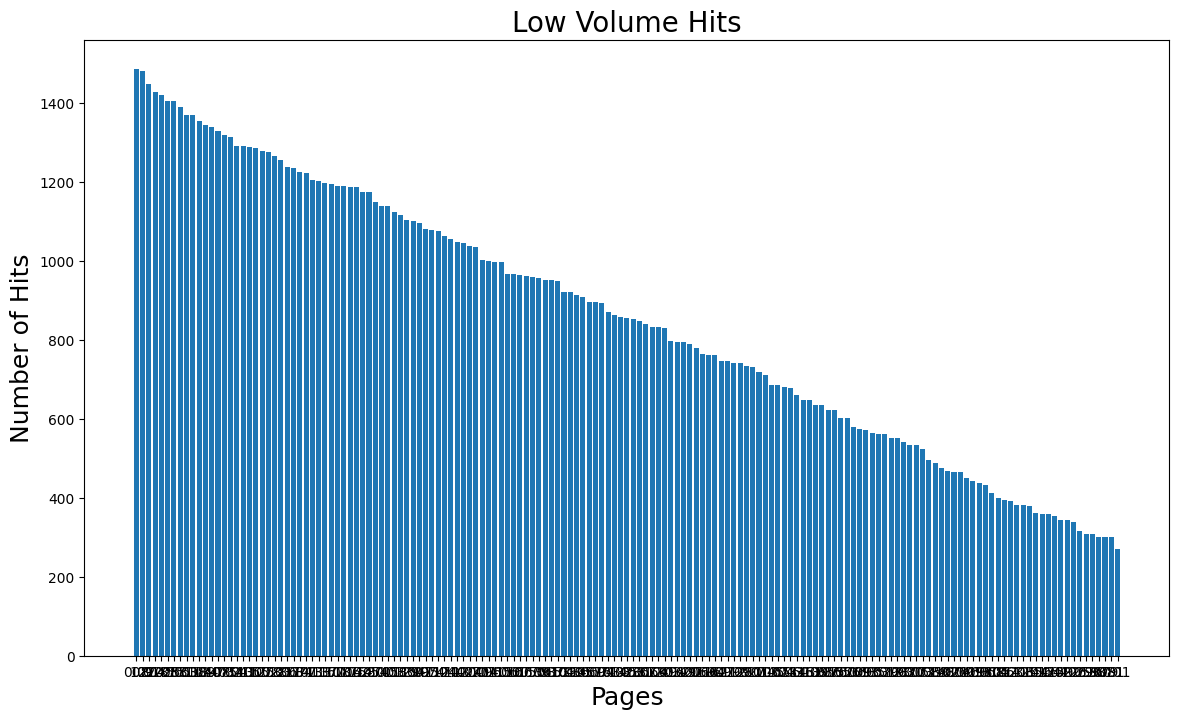

In [10]:
selected = data.columns[data.sum() < 10000]

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Low Volume Hits', fontsize=20)
plt.show()

6. Automatically classifying pages into high, medium and low volume pages.

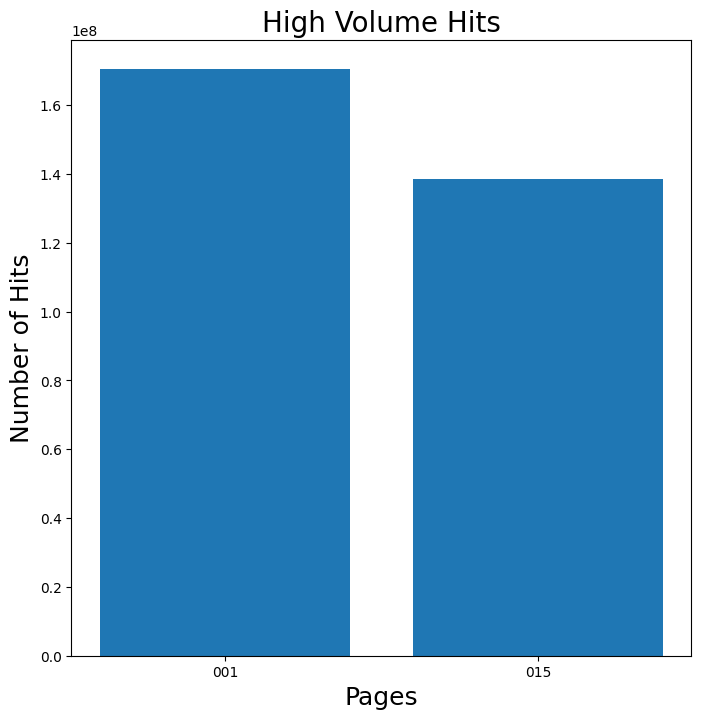

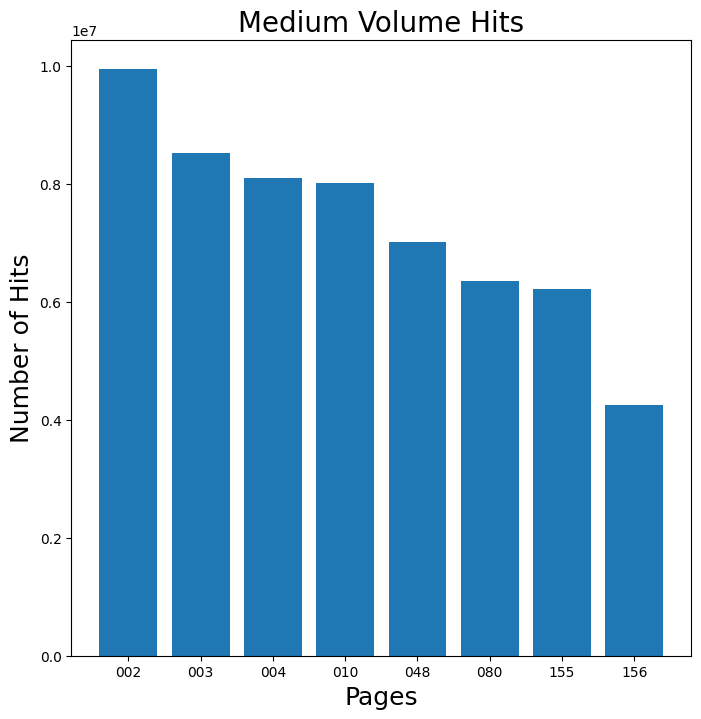

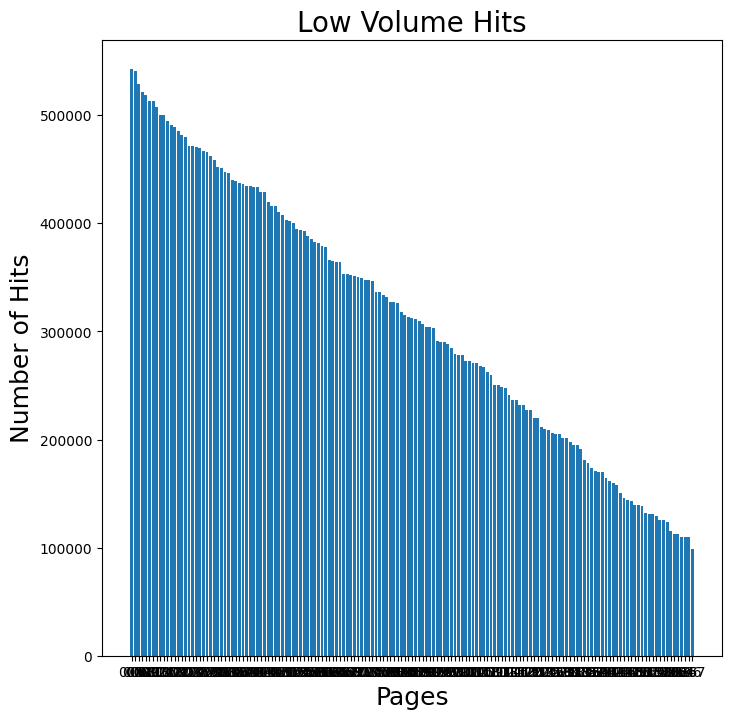

In [15]:
# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]

for name in data.columns:
  total_sales = data[name].sum()
  if total_sales >30000:
    category = 0
  elif total_sales >10000:
    category = 1
  else:
    category = 2
  categories_selected[category]. append(name)

for i, selected in enumerate(categories_selected):
  plt.figure(figsize=(8,8))
  data[selected] = data[selected].sum().sort_values(ascending=False)  # Sort the data in descending order
  x_pos = np.arange(len(data[selected].columns))
  plt.bar(x_pos, data[selected].sum(), align = 'center')
  plt.xticks(x_pos, data[selected].columns)
  plt.xlabel('Pages', fontsize = 18)
  plt.ylabel('Number of Hits', fontsize=18)
  plt.title(categories[i]+' Volume Hits', fontsize = 20)
  plt.show


7. Creating a pie chart summarising the findings. The pie sections are sorted in order of decreasing page hits and all the low-volume pages are grouped together into one pie segment.

             015   001  003  080  155  156  048  002  010  004  ...  159  022  \
Date                                                            ...             
2019-01-01  1184  1062   67   67   39   47   37   33   69   42  ...    0    0   
2019-01-02  1266   976   72   61   59   56   39   41   62   19  ...    0    0   
2019-01-03  1047   956   71   44   58   46   38   27   64   28  ...    0    0   
2019-01-04  1108   976   57   61   39   52   35   30   52   29  ...    2    4   
2019-01-05  1214   956   65   61   40   41   45   45   55   27  ...    0    0   

            126  029  059  138  160  079  081  101  
Date                                                
2019-01-01    2    0    1    2    4    1    2    0  
2019-01-02    2    0    0    1    0    2    0    0  
2019-01-03    2    0    0    0    0    3    3    0  
2019-01-04    0    0    0    0    0    0    0    0  
2019-01-05    0    0    0    0    0    3    1    1  

[5 rows x 167 columns]
             015   001  003  080  155

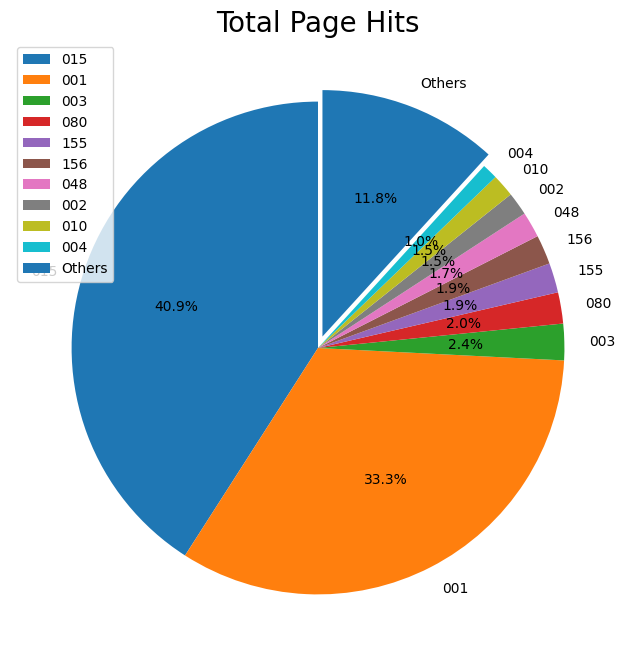

In [ ]:
# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

# sort the data according to the sum of each column
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.head())

explodeList = []
selected = []
columns = data.columns
data['Others'] = [0] * len(data.index)
for name in columns:
    total_sales = data[name].sum()
    if total_sales > 10000:
        selected.append(name)
        explodeList.append(0)
    else:
        data['Others'] += data[name]
selected.append('Others')
explodeList.append(0.05)
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.pie(data[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Page Hits', fontsize=20)
plt.legend(loc=2)
plt.show()